In [1]:
import numpy as np
from scipy.stats import bernoulli
from cvxpy import *
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import imageio
import cv2
import random

In [12]:
def lrm_nuclear_norm_solve(A, mu=1.0):
    X = Variable(shape=A.shape)
    objective = Minimize(normNuc(X) + mu * sum_squares(A-X))
    #objective = Minimize(sum_squares(A-X))
    problem = Problem(objective)
    problem.solve(verbose=False)
    return X.value

In [3]:
def calc_mse(A_act, A_pred):
    return mean_squared_error(A_act, A_pred)

In [4]:
def plot_image(A, title=None):
    plt.imshow(A, cmap='gray')
    plt.title(title, fontsize=15)

In [5]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        img_shape= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,img_shape)
        gauss = gauss.reshape(img_shape)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        img_shape = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        img_shape = image.shape
        gauss = np.random.randn(img_shape)
        gauss = gauss.reshape(img_shape)        
        noisy = image + image * gauss
        return noisy
    else:
        print("Please Specify the noise type from gauss,s&p,poisson,speckle")
        return image


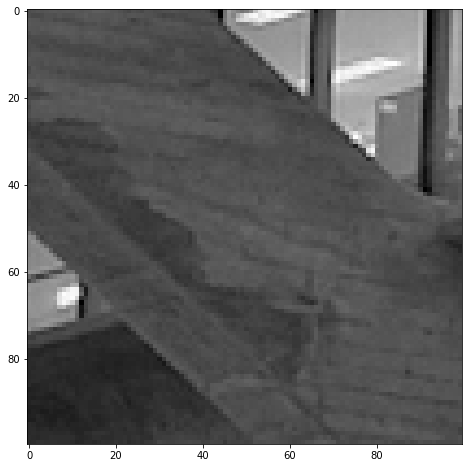

In [6]:
img_path="geisel.jpeg"
img = Image.open(img_path).convert('L')
img = img.crop((700,700,800,800))
img = np.asarray(img)/255.
fig = plt.figure(figsize=[8,8])
plt.imshow(img, cmap='gray')
plt.show()

In [8]:
gaussian_sigma = 0.08
def add_gaussian_noise(img):
    res = img + np.random.normal(0, gaussian_sigma, img.shape)
    res = 255 * np.clip(res, 0, 1)

    return res


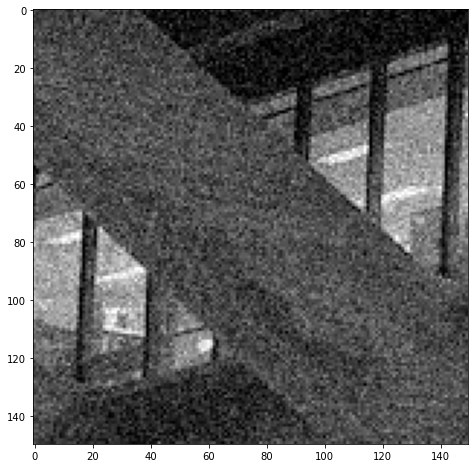

In [8]:
img_gauss=add_gaussian_noise(img)
fig = plt.figure(figsize=[8,8])
plt.imshow(img_gauss, cmap='gray')
plt.show()

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 11 09:23:46 AM: Your problem has 22500 variables, 0 constraints, and 0 parameters.
(CVXPY) Mar 11 09:23:46 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 11 09:23:46 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 11 09:23:46 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 11 09:23:46 AM: Compiling problem (target solver=SCS).
(CVXPY) Mar 11 09:23:46 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

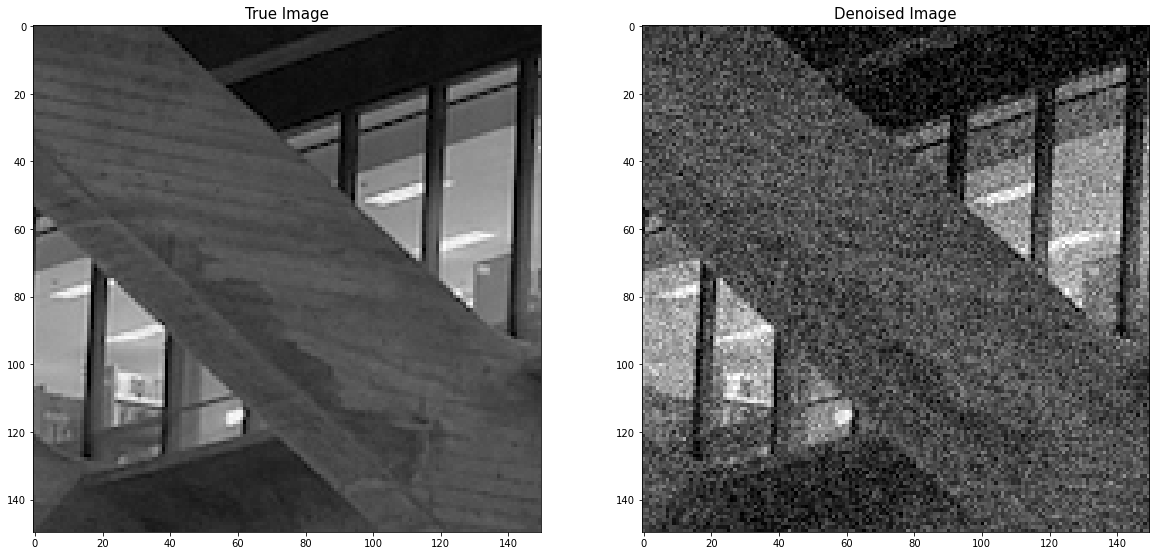

In [9]:
img_pred_gauss = lrm_nuclear_norm_solve(img_gauss, 0.10)
    
print("RMSE: ",calc_mse(img,img_pred_gauss))

plt.figure(figsize=[20, 10])
plt.subplot(121)
plot_image(img, 'True Image')

plt.subplot(122)
plot_image(img_pred_gauss, 'Denoised Image')
    
plt.show()

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 11 09:27:21 AM: Your problem has 22500 variables, 0 constraints, and 0 parameters.
(CVXPY) Mar 11 09:27:21 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 11 09:27:21 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 11 09:27:21 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 11 09:27:21 AM: Compiling problem (target solver=SCS).
(CVXPY) Mar 11 09:27:21 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

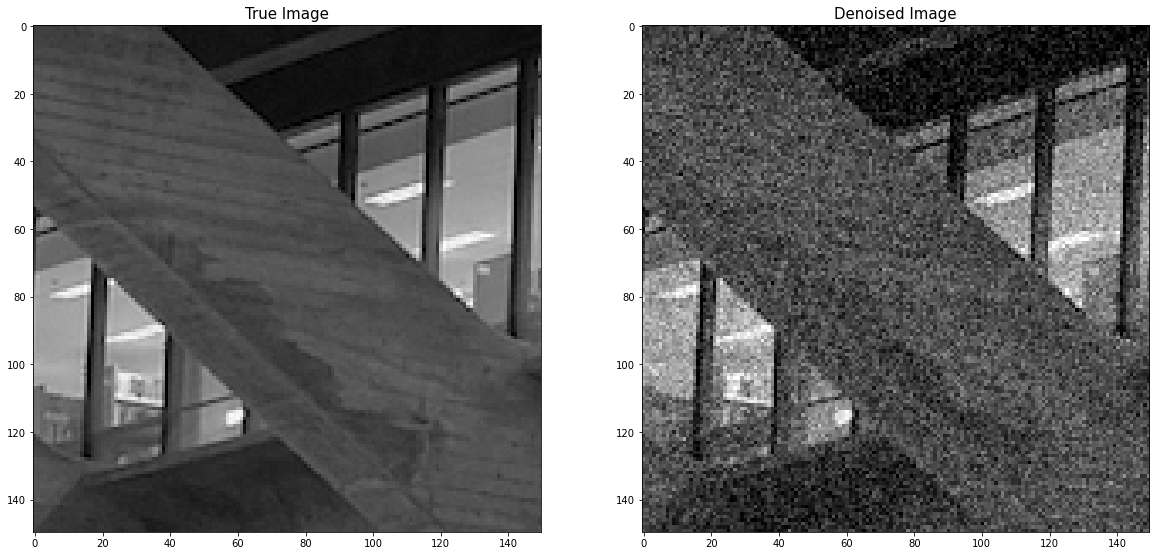

In [10]:
img_pred_gauss_10 = lrm_nuclear_norm_solve(img_gauss, 10.0)
    
print("RMSE: ",calc_mse(img,img_pred_gauss_10))

plt.figure(figsize=[20, 10])
plt.subplot(121)
plot_image(img, 'True Image')

plt.subplot(122)
plot_image(img_pred_gauss_10, 'Denoised Image')
    
plt.show()

In [11]:
img_pred_gauss_01 = lrm_nuclear_norm_solve(img_gauss, 0.01)
    
print("RMSE: ",calc_mse(img,img_pred_gauss_01))

plt.figure(figsize=[20, 10])
plt.subplot(121)
plot_image(img, 'True Image')

plt.subplot(122)
plot_image(img_pred_gauss_01, 'Denoised Image')
    
plt.show()

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 11 09:30:03 AM: Your problem has 22500 variables, 0 constraints, and 0 parameters.
(CVXPY) Mar 11 09:30:03 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 11 09:30:03 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 11 09:30:03 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 11 09:30:03 AM: Compiling problem (target solver=SCS).
(CVXPY) Mar 11 09:30:03 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

SolverError: Solver 'SCS' failed. Try another solver, or solve with verbose=True for more information.

In [10]:
salt_prob = 0.02

def add_salt_noise(img):
    res = np.zeros(img.shape, np.double)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r = random.random()
            #print("r is ",r)
            if r < salt_prob:
                #print("salt")
                res[i][j] = 0.0
            elif r > 1 - salt_prob:
                #print("pepper")
                res[i][j] = 1.0
            else:
                #print("origin")
                res[i][j] = img[i][j]
    return res

In [19]:
# experiments
gauss_denoised=[]
sp_denoised=[]

rmses=[]

img_gauss=add_gaussian_noise(img)
img_sp=add_salt_noise(img)
def one_test(img,img_noised,mu):
    print("test at mu=",mu)
    img_denoised = lrm_nuclear_norm_solve(img_noised, mu)
    
    print("RMSE of img and img_denoised: ",calc_mse(img,img_denoised))
    rmses.append(calc_mse(img,img_denoised))
    print("RMSE of img and img_noised: ",calc_mse(img_noised,img))
    
    return img_denoised



In [20]:
mus=[0.1,0.25,0.5,0.75,1,5,10]
# salt-pepper noise
for mu in mus:
    img_de=one_test(img,img_sp,mu)
    sp_denoised.append(img_de)

test at mu= 0.1
RMSE of img and img_denoised:  0.009695592215242797
RMSE of img and img_noised:  0.012104409073433292
test at mu= 0.25
RMSE of img and img_denoised:  0.003875073792246791
RMSE of img and img_noised:  0.012104409073433292
test at mu= 0.5
RMSE of img and img_denoised:  0.003754385678256173
RMSE of img and img_noised:  0.012104409073433292
test at mu= 0.75
RMSE of img and img_denoised:  0.00515261705433344
RMSE of img and img_noised:  0.012104409073433292
test at mu= 1
RMSE of img and img_denoised:  0.006299236806533624
RMSE of img and img_noised:  0.012104409073433292
test at mu= 5
RMSE of img and img_denoised:  0.010615653388067171
RMSE of img and img_noised:  0.012104409073433292
test at mu= 10
RMSE of img and img_denoised:  0.011336527375809133
RMSE of img and img_noised:  0.012104409073433292


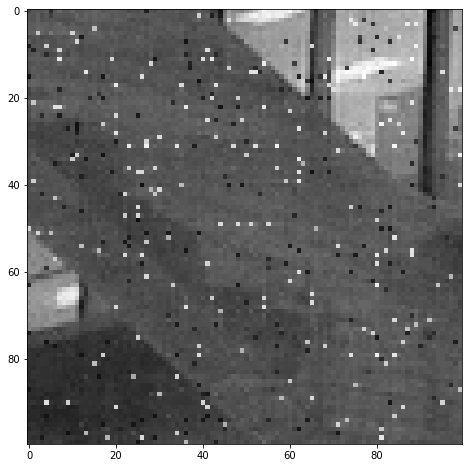

In [18]:
fig = plt.figure(figsize=[8,8])
plt.imshow(sp_denoised[1], cmap='gray')
plt.show()

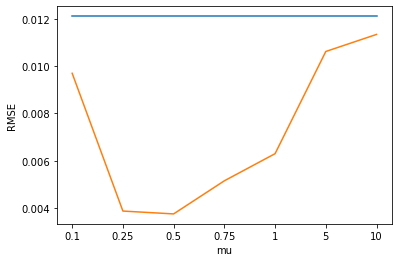

In [31]:
fig,ax=plt.subplots()
plt.xlabel("mu")
plt.ylabel("RMSE")

x=mus
x_fake=range(1,len(mus)+1)
noises=[calc_mse(img_sp,img) for i in range(len(mus))]
plt.plot(x_fake,noises,label='rmse of noised and original images')
plt.plot(x_fake,rmses,label='rmse of denoised and original images')
plt.xticks(x_fake,x)
plt.show()

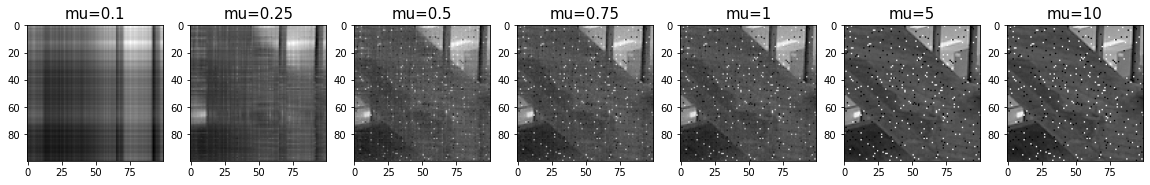

In [38]:
plt.figure(figsize=[20, 10])
for i in range(1,len(sp_denoised)+1):
    plt.subplot(1,len(sp_denoised),i)
    plot_image(sp_denoised[i-1], 'mu='+str(mus[i-1]))


    
plt.show()

In [32]:
mus=[0.1,0.25,0.5,0.75,1,5,10]
# gaussian noise
rmses=[]
for mu in mus:
    img_de=one_test(img,img_gauss,mu)
    gauss_denoised.append(img_de)

test at mu= 0.1
RMSE of img and img_denoised:  8276.922211970097
RMSE of img and img_noised:  8307.471593502092
test at mu= 0.25
RMSE of img and img_denoised:  8295.195023763694
RMSE of img and img_noised:  8307.471593502092
test at mu= 0.5
RMSE of img and img_denoised:  8301.328765260603
RMSE of img and img_noised:  8307.471593502092
test at mu= 0.75
RMSE of img and img_denoised:  8303.369495331532
RMSE of img and img_noised:  8307.471593502092
test at mu= 1
RMSE of img and img_denoised:  8304.395047409658
RMSE of img and img_noised:  8307.471593502092
test at mu= 5
RMSE of img and img_denoised:  8306.854086204125
RMSE of img and img_noised:  8307.471593502092
test at mu= 10
RMSE of img and img_denoised:  8307.163713631751
RMSE of img and img_noised:  8307.471593502092


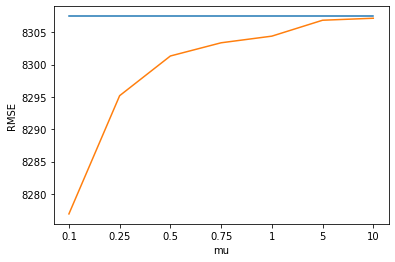

In [34]:
fig,ax=plt.subplots()
plt.xlabel("mu")
plt.ylabel("RMSE")

x=mus
x_fake=range(1,len(mus)+1)
noises=[calc_mse(img_gauss,img) for i in range(len(mus))]
plt.plot(x_fake,noises,label='rmse of noised and original images')
plt.plot(x_fake,rmses,label='rmse of denoised and original images')
plt.xticks(x_fake,x)
plt.show()

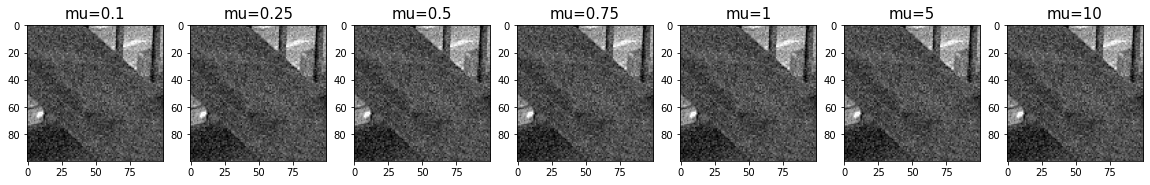

In [39]:
plt.figure(figsize=[20, 10])
for i in range(1,len(gauss_denoised)+1):
    plt.subplot(1,len(gauss_denoised),i)
    plot_image(gauss_denoised[i-1], 'mu='+str(mus[i-1]))


    
plt.show()

In [ ]:
mus=[0.01,0.05,0.1,1]
gauss_denoised_v2=[]
# gaussian noise
rmses=[]
for mu in mus:
    img_de=one_test(img,img_gauss,mu)
    gauss_denoised_v2.append(img_de)

test at mu= 0.01


In [ ]:
fig,ax=plt.subplots()
plt.xlabel("mu")
plt.ylabel("RMSE")

x=mus
x_fake=range(1,len(mus)+1)
noises=[calc_mse(img_gauss,img) for i in range(len(mus))]
plt.plot(x_fake,noises,label='rmse of noised and original images')
plt.plot(x_fake,rmses,label='rmse of denoised and original images')
plt.xticks(x_fake,x)
plt.show()